In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('online-shopping.csv')
df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [3]:
#Add a total sales column
df['Total_Sales'] =df['Quantity'] * df['Avg_Price']


In [4]:
df.drop(columns = ['Unnamed: 0'],axis = 1,inplace = True)

In [5]:
df.dropna(inplace=True)

In [6]:
df.dtypes

CustomerID             float64
Gender                  object
Location                object
Tenure_Months          float64
Transaction_ID         float64
Transaction_Date        object
Product_SKU             object
Product_Description     object
Product_Category        object
Quantity               float64
Avg_Price              float64
Delivery_Charges       float64
Coupon_Status           object
GST                    float64
Date                    object
Offline_Spend          float64
Online_Spend           float64
Month                    int64
Coupon_Code             object
Discount_pct           float64
Total_Sales            float64
dtype: object

In [7]:

df['Coupon_Status'] = pd.to_numeric(df['Coupon_Status'], errors='coerce')


In [8]:
grouped_data = df.groupby('CustomerID').agg({
    'Total_Sales': 'sum',
    'Offline_Spend': 'sum',
    'Online_Spend': 'sum',
    'Quantity': 'sum',
    'Tenure_Months': 'max',
    'Discount_pct': 'mean',
    'Coupon_Status': 'mean'
}).reset_index()


In [9]:
fm = df.groupby('CustomerID').agg({
    #'Transaction_Date': lambda x: (recent_date - x.max()).days,  # Recency
    'Transaction_ID': 'count',  # Frequency
    'Total_Sales': 'sum'  # Monetary
}).reset_index()

fm.columns = ['CustomerID','Frequency', 'Monetary']
print(fm)

      CustomerID  Frequency  Monetary
0        12346.0          2     30.99
1        12347.0         59  13812.52
2        12348.0         23   1442.12
3        12350.0         17   1360.07
4        12356.0         36   1442.47
...          ...        ...       ...
1463     18259.0          6    526.75
1464     18260.0         39   2316.25
1465     18269.0          8    101.56
1466     18277.0          1    298.00
1467     18283.0        101   6348.37

[1468 rows x 3 columns]


In [10]:
#Univariate Analysis

clustering = KMeans(n_clusters=3)


In [11]:
clustering.fit(fm[['Frequency']])

KMeans(n_clusters=3)

In [12]:
fm['Freq Cluster'] = clustering.labels_
fm.head()

,CustomerID,Frequency,Monetary,Freq Cluster
0,12346.0,2,30.99,0
1,12347.0,59,13812.52,0
2,12348.0,23,1442.12,0
3,12350.0,17,1360.07,0
4,12356.0,36,1442.47,0


In [13]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(fm[["Frequency"]])
    inertia_scores.append(kmeans.inertia_)

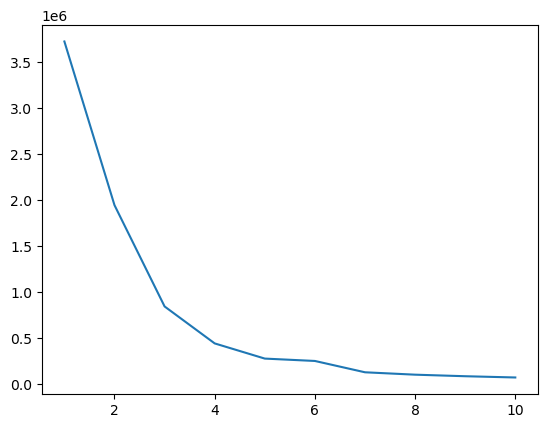

In [14]:
plt.plot(range(1,11),inertia_scores)

<Axes: xlabel='Freq Cluster', ylabel='Frequency'>

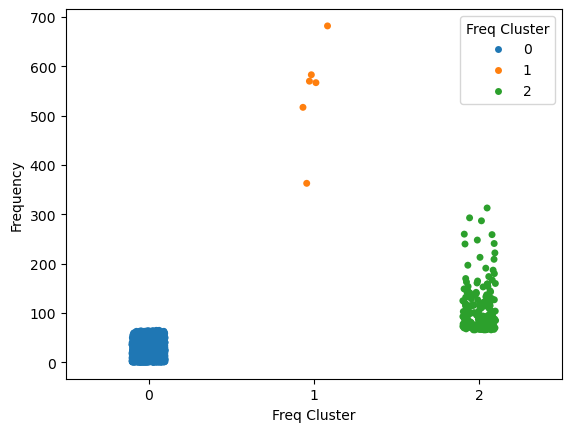

In [15]:
import seaborn as sns
sns.stripplot(data=fm,x='Freq Cluster', y='Frequency',hue='Freq Cluster',palette='tab10')

<Axes: xlabel='Frequency', ylabel='Count'>

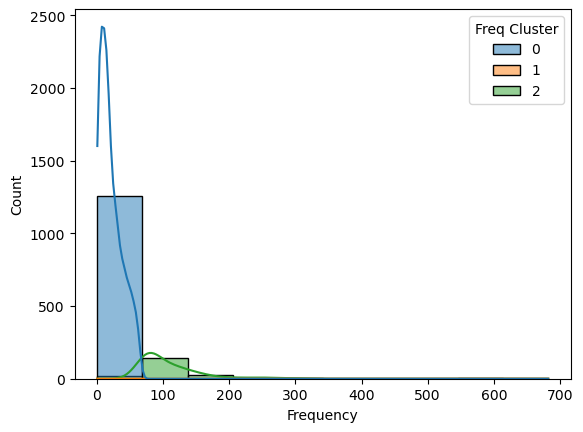

In [16]:
sns.histplot(data=fm,x='Frequency',hue='Freq Cluster',palette='tab10',bins = 10, kde=True)

In [17]:
#bivariate 
clustering2 = KMeans(n_clusters=3)

In [18]:
clustering2.fit(fm[['Frequency','Monetary']])

KMeans(n_clusters=3)

In [19]:
fm['fm labels']=clustering2.labels_

In [20]:
inertia_scores= []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(fm[['Frequency','Monetary']])
    inertia_scores.append(kmeans.inertia_)
    

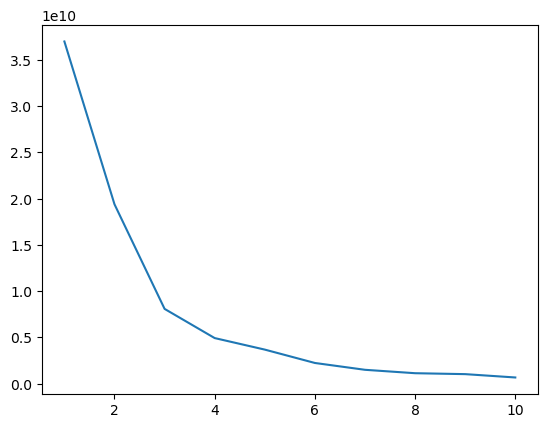

In [21]:
plt.plot(range(1,11),inertia_scores)

<Axes: xlabel='Frequency', ylabel='Monetary'>

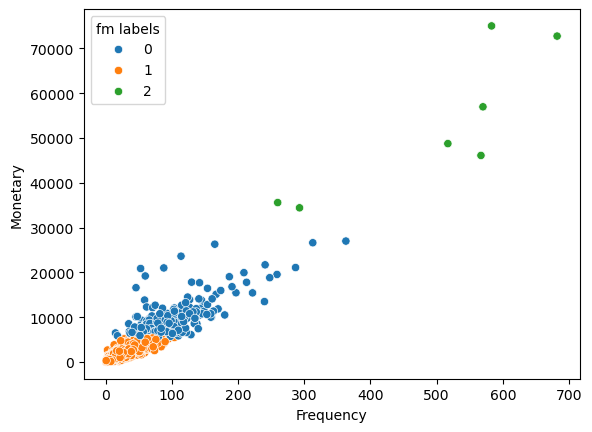

In [22]:
sns.scatterplot(data=fm,x='Frequency',y='Monetary',hue='fm labels',palette='tab10')

In [23]:
#lets scale our features
from sklearn.preprocessing import StandardScaler
fm.head()

,CustomerID,Frequency,Monetary,Freq Cluster,fm labels
0,12346.0,2,30.99,0,1
1,12347.0,59,13812.52,0,0
2,12348.0,23,1442.12,0,1
3,12350.0,17,1360.07,0,1
4,12356.0,36,1442.47,0,1


In [24]:
scale = StandardScaler()

In [27]:
fmm=fm[['Frequency','Monetary']]
fmm=pd.DataFrame(scale.fit_transform(fmm))
fmm.head()

,0,1
0,-0.670467,-0.624130
1,0.460895,2.121976
2,-0.253649,-0.342949
3,-0.372740,-0.359298
4,0.004381,-0.342879


In [28]:
clustering3 = KMeans(n_clusters=3)
clustering3.fit(fmm)
fmm['fmm Cluster'] = clustering3.labels_
fmm.head()

,0,1,fmm Cluster
0,-0.670467,-0.624130,0
1,0.460895,2.121976,1
2,-0.253649,-0.342949,0
3,-0.372740,-0.359298,0
4,0.004381,-0.342879,0


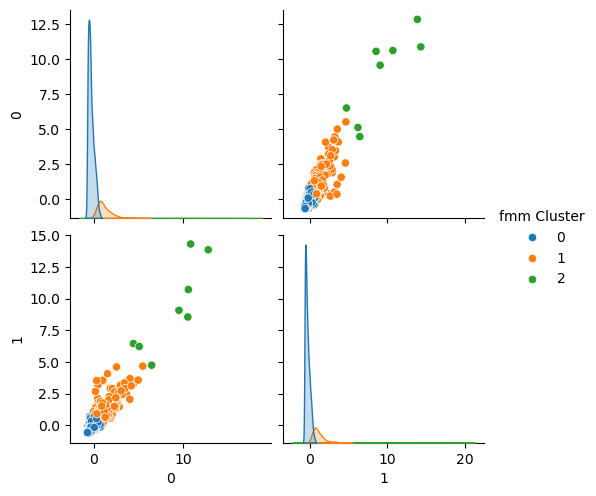

In [33]:
sns.pairplot(fmm,hue='fmm Cluster',palette='tab10')